In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
import pandas as pd
import keras
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from keras.layers import Dense,Activation,Flatten,MaxPool2D,Conv2D,Dropout
from keras.layers.normalization import BatchNormalization
import keras.backend as K
import itertools
%matplotlib inline

Using TensorFlow backend.


In [26]:
img_width, img_height=224,224
train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
test_data_dir = 'data/test'
nb_train_samples=400
nb_validation_samples=100
epochs=16
batch_size=10


if K.image_data_format() == 'channel_first':
    input_shape = (3,img_width, img_height)
else:
     input_shape = (img_width, img_height, 3)
        
train_datagen = ImageDataGenerator(rescale= 1. / 255,
                                   rotation_range=90,
                                   shear_range = 0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
        

train_batches = train_datagen.flow_from_directory(
                train_data_dir,
                target_size=(img_width,img_height), 
                classes=['dogs','cats'], 
                batch_size=10)

test_batches = ImageDataGenerator().flow_from_directory(
               test_data_dir,
               target_size=(img_width,img_height),
               classes=['dogs','cats'], 
               batch_size=10)

valid_batches = train_datagen.flow_from_directory(
               validation_data_dir, 
               target_size=(img_width,img_height),
               classes=['dogs','cats'],
               batch_size=10)

Found 8000 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 1920 images belonging to 2 classes.


In [3]:
model=Sequential()
model.add(Conv2D(32,(3,3), input_shape = input_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)      

In [ ]:

model.compile( Adam(lr=.0001),
              loss='categorical_crossentropy',
             metrics=['accuracy'])


# Train the model

In [5]:
h=model.fit_generator(
    
                    train_batches,
                    steps_per_epoch=nb_train_samples,
                    epochs = epochs,
                    validation_data=valid_batches,
                    validation_steps=nb_validation_samples)

Epoch 1/16
400/400 [==============================] - 283s 708ms/step - loss: 0.6922 - accuracy: 0.5038 - val_loss: 0.6934 - val_accuracy: 0.5010
Epoch 2/16
400/400 [==============================] - 294s 734ms/step - loss: 0.6815 - accuracy: 0.5600 - val_loss: 0.6757 - val_accuracy: 0.5940
Epoch 3/16
400/400 [==============================] - 294s 735ms/step - loss: 0.6380 - accuracy: 0.6183 - val_loss: 0.5275 - val_accuracy: 0.7000
Epoch 4/16
400/400 [==============================] - 290s 725ms/step - loss: 0.6136 - accuracy: 0.6543 - val_loss: 0.8559 - val_accuracy: 0.6880
Epoch 5/16
400/400 [==============================] - 294s 734ms/step - loss: 0.5904 - accuracy: 0.6877 - val_loss: 0.5401 - val_accuracy: 0.6980
Epoch 6/16
400/400 [==============================] - 297s 743ms/step - loss: 0.5829 - accuracy: 0.6885 - val_loss: 0.6065 - val_accuracy: 0.7030
Epoch 7/16
400/400 [==============================] - 295s 738ms/step - loss: 0.5607 - accuracy: 0.7138 - val_loss: 0.4874 -

# Loss

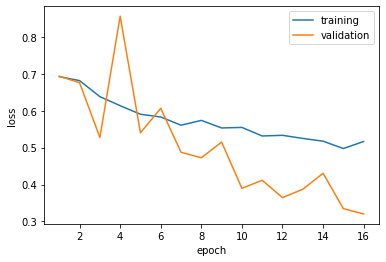

In [210]:
epoch_nums = range(1, epochs+1)
training_loss = h.history["loss"]
validation_loss = h.history["val_loss"]
plt.plot(epoch_nums , training_loss)
plt.plot(epoch_nums , validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','validation'], loc='upper right')
plt.show()

In [7]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


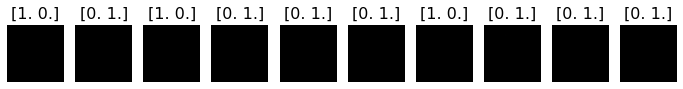

In [8]:
imgs, labels = next(train_batches)
plots(imgs,titles=labels)

# Prediction

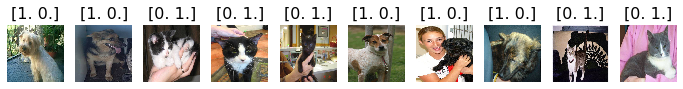

In [169]:
test_imgs,test_labels = next(test_batches)
plots(test_imgs,titles=test_labels)

In [170]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0.], dtype=float32)

In [171]:
predictions = model.predict_generator(test_batches,steps=1,verbose=0)
predictions

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# Confusion Matrix  
# Precision     
# Recall    
# F1_score


In [208]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions[:,0]))


              precision    recall  f1-score   support

         0.0       1.00      0.40      0.57         5
         1.0       0.62      1.00      0.77         5

    accuracy                           0.70        10
   macro avg       0.81      0.70      0.67        10
weighted avg       0.81      0.70      0.67        10



[[2 3]
 [0 5]]
True Negatives:  2
False Positives:  3
False Negatives:  0
True Positives:  5


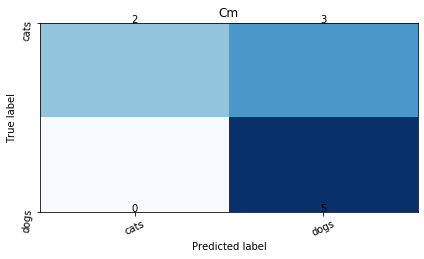

In [209]:
print(confusion_matrix(test_labels, predictions[:,0]))
cm = confusion_matrix(test_labels, predictions[:,0])


tn, fp, fn, tp = confusion_matrix(test_labels, predictions[:,0]).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

cmap=plt.cm.Blues
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title('Cm')
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=25)
plt.yticks(tick_marks, classes, rotation=85)

thresh = cm.max() 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j]),
           horizontalalignment="center",
           color="white" if cm[i, j] > thresh else "black"
    )

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()